In [1]:
import scipy.stats as scs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import auc, roc_curve, classification_report
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [2]:
df1 = pd.read_csv('course_hero_data/DS_interview_doc.csv')
df2 = pd.read_csv('course_hero_data/DS_interview_paid_unlock.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
New_ID                10000 non-null int64
date                  10000 non-null object
year_month            10000 non-null object
byte_size             10000 non-null int64
filetype              10000 non-null object
school_country        10000 non-null object
school_name           10000 non-null object
school_type           10000 non-null object
enrollment            9932 non-null float64
first_subject_name    10000 non-null object
tag                   9999 non-null object
page_count            10000 non-null float64
hqd_score             9789 non-null float64
is_mcq                415 non-null float64
top_keywords          10000 non-null int64
language              9575 non-null object
course_id_            10000 non-null int64
user_id_              10000 non-null int64
dtypes: float64(4), int64(5), object(9)
memory usage: 1.4+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38868 entries, 0 to 38867
Data columns (total 3 columns):
New_ID         38868 non-null int64
unlock_date    38868 non-null object
unlock_cnt     38868 non-null int64
dtypes: int64(2), object(1)
memory usage: 911.0+ KB


In [5]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})

In [6]:
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
enrollment,enrollment,0.68
tag,tag,0.01
hqd_score,hqd_score,2.11
is_mcq,is_mcq,95.85
language,language,4.25


In [7]:
df1.head()

,New_ID,date,year_month,byte_size,filetype,school_country,school_name,school_type,enrollment,first_subject_name,tag,page_count,hqd_score,is_mcq,top_keywords,language,course_id_,user_id_
0,880,2017-11-19,2017-11,48940,docx,United States,Fordham University,HIGHER,17901.0,accounting,paper,4.0,0.95683,NaN,1,NaN,0,0
1,881,2016-06-10,2016-06,5336,docx,United States,Rio Salado Community College,HIGHER,6086.0,economics,paper,1.0,0.77776,NaN,0,english,1,1
2,882,2017-03-20,2017-03,18034,docx,United States,University of Phoenix,HIGHER,212044.0,sociology,paper,3.0,0.94462,NaN,1,english,2,2
3,883,2018-01-28,2018-01,16518,docx,Canada,University of Waterloo,HIGHER,36670.0,history,notes,3.0,0.96980,NaN,0,english,3,3
4,884,2017-06-11,2017-06,88860,docx,United States,"University of California, Santa Barbara",HIGHER,25833.0,sociology,notes,4.0,0.96610,NaN,1,english,4,4


In [8]:
df2.head()

,New_ID,unlock_date,unlock_cnt
0,6488,2016-07-25,1
1,6488,2017-05-03,1
2,6488,2017-05-03,1
3,6488,2017-10-28,1
4,6488,2018-01-24,1


In [9]:
df1['date'] = pd.to_datetime(df1['date'], format = '%Y-%m-%d')
df2['unlock_date'] = pd.to_datetime(df2['unlock_date'], format = '%Y-%m-%d')

In [10]:
print('DS_interview_doc min date: ',df1['date'].min())
print('DS_interview_doc max date: ',df1['date'].max())
print('DS_interview_paid_unlock min date: ',df2['unlock_date'].min())
print('DS_interview_paid_unlock max date: ',df2['unlock_date'].max())

DS_interview_doc min date:  2016-06-01 00:00:00
DS_interview_doc max date:  2018-03-31 00:00:00
DS_interview_paid_unlock min date:  2016-06-15 00:00:00
DS_interview_paid_unlock max date:  2021-01-27 00:00:00


In [11]:
df11 = df1[['New_ID', 'date']].copy()
df_high = df11.merge(df2, on='New_ID')

In [12]:
df_target = df_high[ (df_high['date'] + pd.DateOffset(months=24)) >= df_high['unlock_date']]

In [13]:
df_target = df_target.groupby('New_ID')['unlock_cnt'].sum().reset_index()
df_target['is_high'] = np.where(df_target['unlock_cnt'] >= 3,1,0)

In [14]:
df_target['is_high'].sum()

1612

In [15]:
df = df1.merge(df_target[['New_ID','unlock_cnt','is_high']], on='New_ID', how='left')
df['is_high'].fillna(0, inplace=True)
df['unlock_cnt'].fillna(0, inplace=True)

In [16]:
df['is_high'].mean()

0.1612

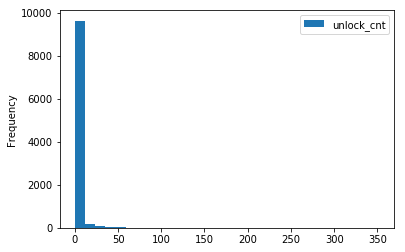

In [17]:
df.plot(y = 'unlock_cnt', kind = 'hist', bins=30)

In [18]:
df[['unlock_cnt']].describe()

,unlock_cnt
count,10000.000000
mean,2.195200
std,9.484845
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,352.000000


In [19]:
df[df['unlock_cnt'] > 100].sort_values(by='unlock_cnt',ascending=False)

,New_ID,date,year_month,byte_size,filetype,school_country,school_name,school_type,enrollment,first_subject_name,tag,page_count,hqd_score,is_mcq,top_keywords,language,course_id_,user_id_,unlock_cnt,is_high
5576,6456,2018-02-27,2018-02,640272,docx,United States,Chamberlain College of Nursing,HIGHER,25569.0,nursing,assessment,224.0,0.86397,1.0,1,en,5467,5508,352.0,1.0
8400,9280,2017-02-01,2017-02,22921,docx,United States,Walden University,HIGHER,52799.0,nursing,assessment,4.0,0.98229,NaN,1,english,8177,8256,224.0,1.0
5984,6864,2017-09-20,2017-09,44268,docx,United States,American Military University,HIGHER,46420.0,electrical_engineering,assessment,4.0,0.96594,NaN,1,english,5864,5904,217.0,1.0
4260,5140,2017-07-08,2017-07,86009,docx,United States,Aims Community College,HIGHER,7966.0,mathematics,assessment,3.0,0.94523,NaN,1,english,4197,4223,215.0,1.0
245,1125,2017-09-26,2017-09,330761,docx,United States,Straighterline,HIGHER,70000.0,business,assessment,4.0,0.95673,NaN,1,english,244,244,181.0,1.0
5318,6198,2017-10-28,2017-10,16189,docx,United States,Southern New Hampshire University,HIGHER,104068.0,communications,paper,2.0,0.94608,NaN,0,english,5221,5258,171.0,1.0
4269,5149,2018-03-13,2018-03,38193,docx,United States,Western Governors University,HIGHER,110534.0,nursing,paper,19.0,0.95188,NaN,1,en,4204,4232,166.0,1.0
6221,7101,2017-11-17,2017-11,721272,pdf,United States,University of Texas,HIGHER,51832.0,nursing,syllabi,9.0,0.88563,NaN,1,english,6093,6137,158.0,1.0
5280,6160,2017-10-25,2017-10,6206,docx,United States,"University of North Carolina, Greensboro",HIGHER,22138.0,economics,assessment,2.0,0.95927,1.0,0,english,5184,5220,147.0,1.0
5542,6422,2017-07-01,2017-07,111616,doc,United States,University of Phoenix,HIGHER,212044.0,management,paper,6.0,0.94283,NaN,0,english,5435,5474,146.0,1.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
New_ID                10000 non-null int64
date                  10000 non-null datetime64[ns]
year_month            10000 non-null object
byte_size             10000 non-null int64
filetype              10000 non-null object
school_country        10000 non-null object
school_name           10000 non-null object
school_type           10000 non-null object
enrollment            9932 non-null float64
first_subject_name    10000 non-null object
tag                   9999 non-null object
page_count            10000 non-null float64
hqd_score             9789 non-null float64
is_mcq                415 non-null float64
top_keywords          10000 non-null int64
language              9575 non-null object
course_id_            10000 non-null int64
user_id_              10000 non-null int64
unlock_cnt            10000 non-null float64
is_high               10000 non-null float64
dtypes: d

In [21]:
df['year'] = df['year_month'].str.split('-').str[0].astype(int)

In [22]:
df['year'].nunique()

3

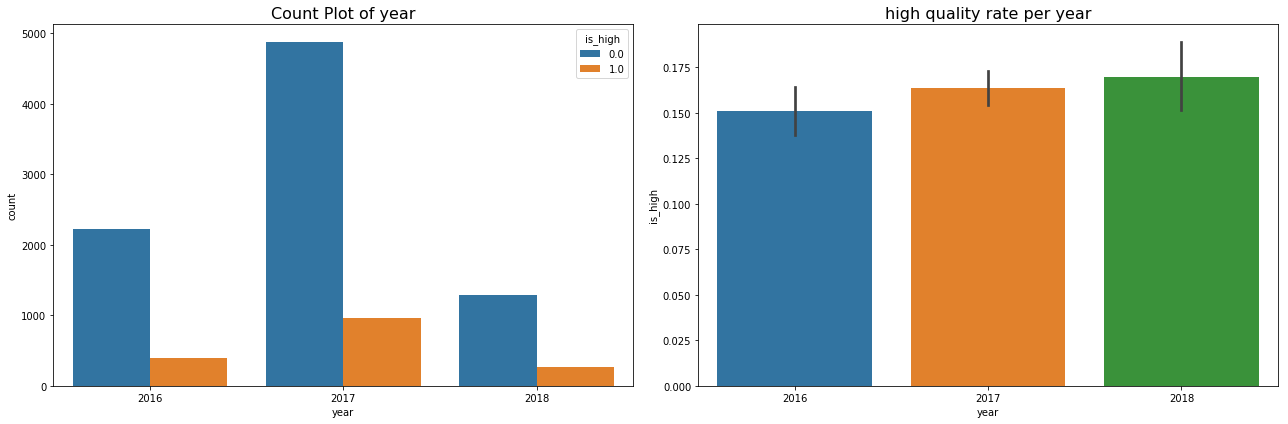

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='year', hue='is_high', data=df, ax=ax[0])
ax[0].set_title('Count Plot of year', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='year', y='is_high', data=df, ax=ax[1]);
ax[1].set_title('high quality rate per year', fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
def save_show_hists(num_1, num_2, bins, xtitle, label_1, label_2,
                    xlog=False, delta=1):
    
    fig = plt.figure(figsize=(12, 8))
    plt.yscale('log', nonposy='clip')
    if xlog:
        plt.xscale('log')
        x_min = min(min(num_1) + delta, min(num_2) + delta)
        x_max = max(max(num_1), max(num_2))
        bins = np.logspace(np.log10(x_min), np.log10(x_max), bins)
    elif type(bins) is int:
        x_min = min(min(num_1), min(num_2))
        x_max = max(max(num_1), max(num_2))
        bins = np.linspace(x_min, x_max, bins)
    plt.hist(num_1, bins=bins, density=True, label=label_1, alpha=0.4)
    plt.hist(num_2, bins=bins, density=True, label=label_2, alpha=0.4)
    plt.ylabel('normalized counts', fontsize=18)
    plt.xlabel(xtitle, fontsize=18)
    plt.legend()
    plt.grid()

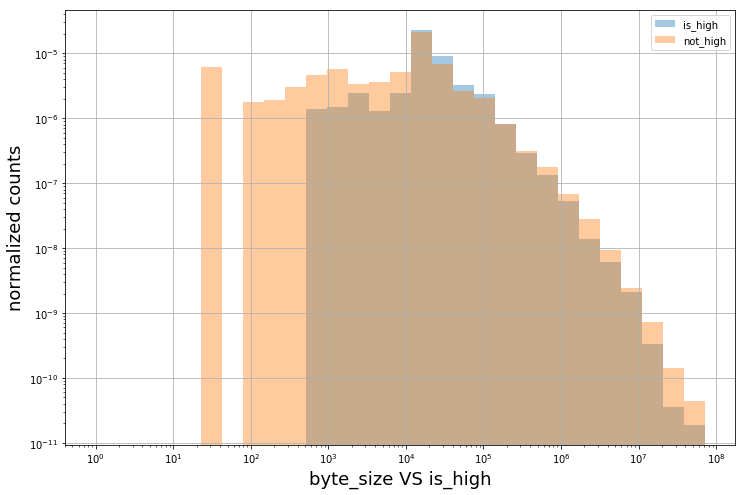

In [25]:
num_1 = df[df['is_high'] == 1]['byte_size']
num_2 = df[df['is_high'] == 0]['byte_size']
save_show_hists(num_1, num_2, 30, 'byte_size VS is_high', 'is_high', 'not_high',True)

In [26]:
top_ten_list = df['filetype'].value_counts().nlargest(10).index.tolist()
df['filetype_std'] = np.where(df['filetype'].isin(top_ten_list),df['filetype'],'non_top_ten')

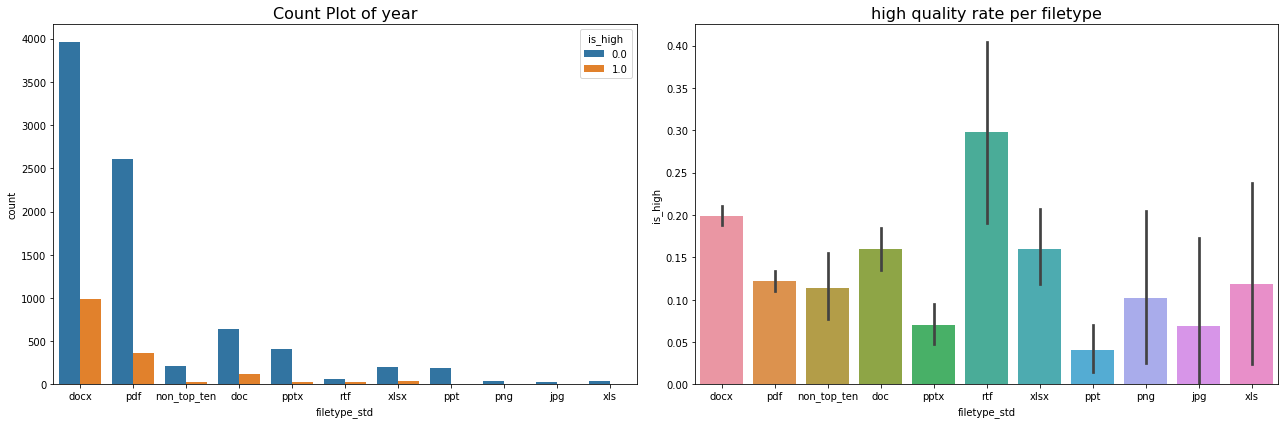

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='filetype_std', hue='is_high', data=df, ax=ax[0])
ax[0].set_title('Count Plot of year', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='filetype_std', y='is_high', data=df, ax=ax[1]);
ax[1].set_title('high quality rate per filetype', fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
top_ten_list = df['school_country'].value_counts().nlargest(10).index.tolist()
df['school_country_std'] = np.where(df['school_country'].isin(top_ten_list),df['school_country'],'non_top_ten')

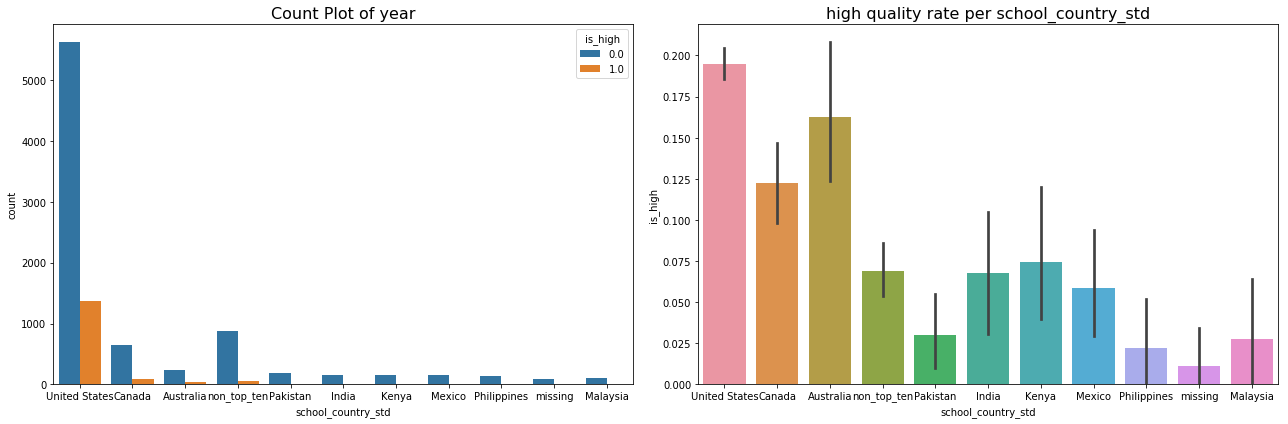

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='school_country_std', hue='is_high', data=df, ax=ax[0])
ax[0].set_title('Count Plot of year', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='school_country_std', y='is_high', data=df, ax=ax[1]);
ax[1].set_title('high quality rate per school_country_std', fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
top_ten_list = df['school_name'].value_counts().nlargest(10).index.tolist()
df['school_name_std'] = np.where(df['school_name'].isin(top_ten_list),df['school_name'],'non_top_ten')

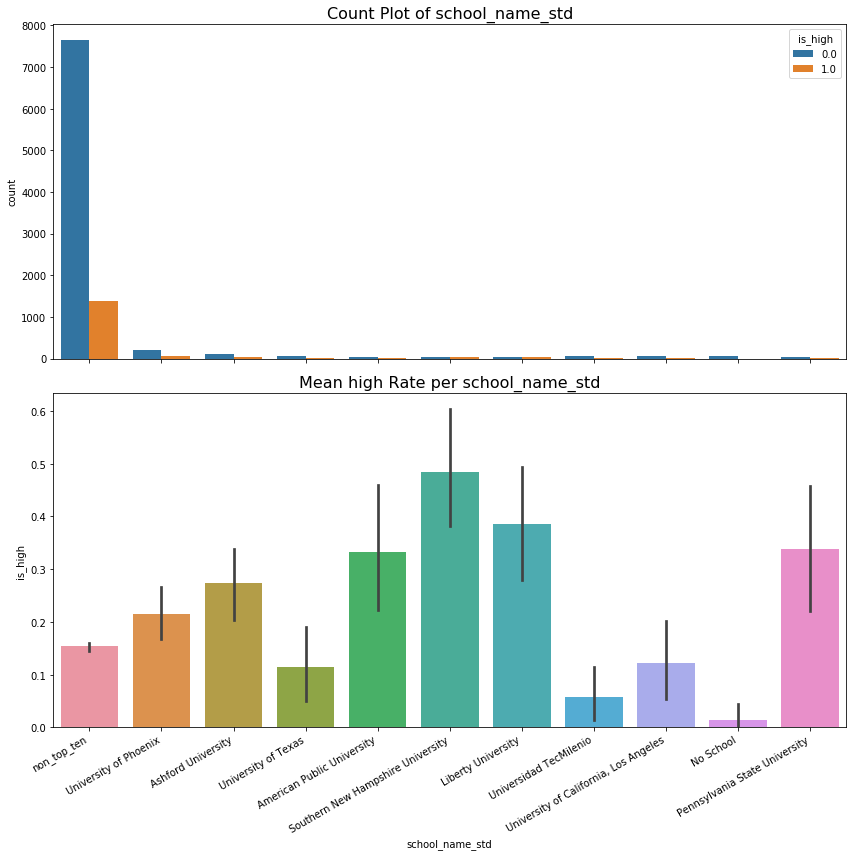

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.countplot(x='school_name_std', hue='is_high', data=df, ax=ax[0])
ax[0].set_title('Count Plot of school_name_std', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='school_name_std', y='is_high', data=df, ax=ax[1]);
ax[1].set_title('Mean high Rate per school_name_std', fontsize=16)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [32]:
top_ten_list = df['school_type'].value_counts().nlargest(10).index.tolist()
df['school_type_std'] = np.where(df['school_type'].isin(top_ten_list),df['school_type'],'non_top_ten')

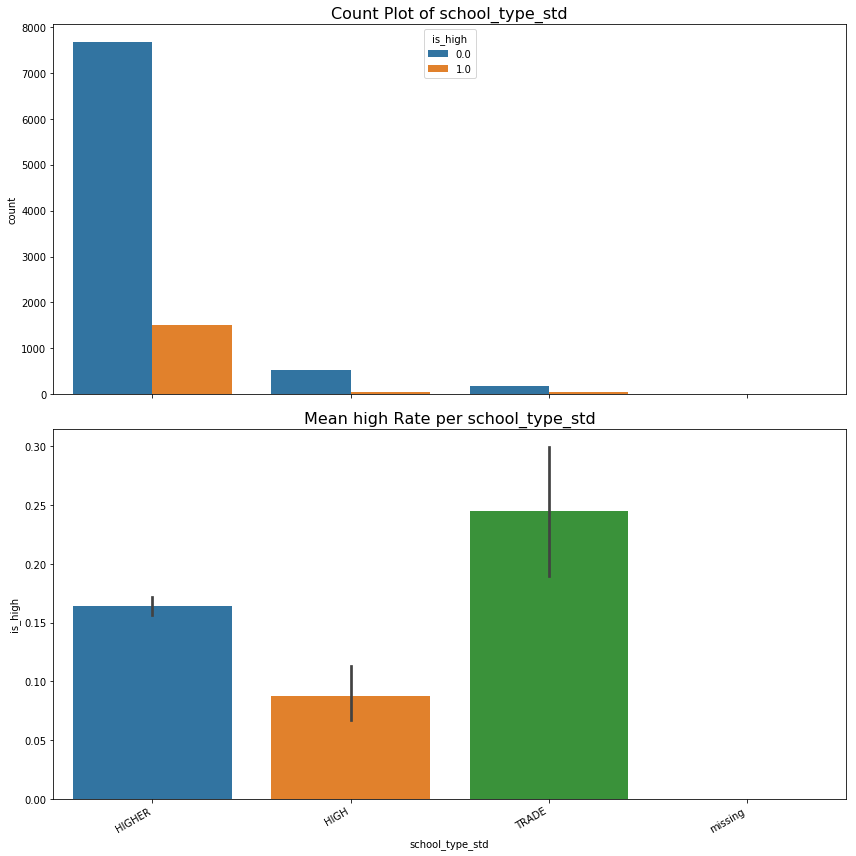

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.countplot(x='school_type_std', hue='is_high', data=df, ax=ax[0])
ax[0].set_title('Count Plot of school_type_std', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='school_type_std', y='is_high', data=df, ax=ax[1]);
ax[1].set_title('Mean high Rate per school_type_std', fontsize=16)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [34]:
top_ten_list = df['first_subject_name'].value_counts().nlargest(10).index.tolist()
df['first_subject_name_std'] = np.where(df['first_subject_name'].isin(top_ten_list),df['first_subject_name'],'non_top_ten')

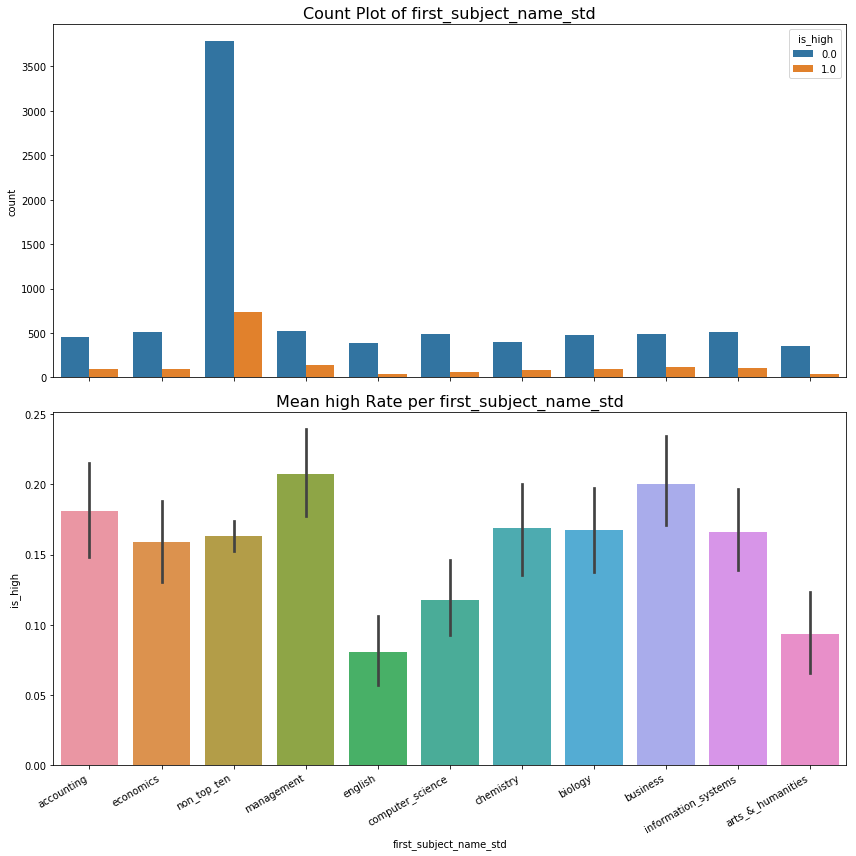

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.countplot(x='first_subject_name_std', hue='is_high', data=df, ax=ax[0])
ax[0].set_title('Count Plot of first_subject_name_std', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='first_subject_name_std', y='is_high', data=df, ax=ax[1]);
ax[1].set_title('Mean high Rate per first_subject_name_std', fontsize=16)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()